## EDA for HPSAs with type "Facility"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium import plugins

pd.options.display.max_columns = 320
pd.options.display.max_rows = 60

In [2]:
file_path = '../datasets/'
file_hpsa = '03_cleaned_hpsas_filtered.csv'

In [3]:
hpsa = pd.read_csv(file_path + file_hpsa)
hpsa_facilities = hpsa[hpsa['Designation'] == 'Facility']
hpsa_facilities.head(3)

,HPSA Designation Date,HPSA Name,Designation Type,HPSA Score,HPSA Status,HPSA Designation Last Update Date,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,Primary HHS Region Name,Rural Status,Longitude,Latitude,Common County Name,Common State County FIPS Code,County Equivalent Name,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Provider Ratio Goal,HPSA Shortage,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Designation,State Population
2,1978-04-24,Metropolitan State Hospital,State Mental Hospital,0,Withdrawn,1986-08-19,Not applicable,1986-08-19,22.0,0.0,NaN,0,Region 9,Partially Rural,-119.270230,36.374106,"Tulare County, CA",06107,Tulare,Unknown,State Mental Hospital,0.0,0.0,300:1,0.0,California,U,N,Facility,39512223.0
7,1978-05-23,Seattle and Kings County Jails,Correctional Facility,0,Withdrawn,1986-02-14,Not applicable,1986-02-14,1.5,0.0,NaN,0,Region 10,Partially Rural,-120.556263,47.411252,"Chelan County, WA",53007,Chelan,Unknown,Correctional Facility,0.0,0.0,2000:1,0.0,Washington,N,N,Facility,7614893.0
8,1978-05-26,Athens Mental Health Center,State Mental Hospital,0,Withdrawn,1996-12-31,Not applicable,1996-12-31,1.9,0.0,NaN,0,Region 5,Partially Rural,-82.711215,40.413057,"Morrow County, OH",39117,Morrow,Unknown,State Mental Hospital,0.0,0.0,300:1,0.7,Ohio,N,N,Facility,11689100.0


In [4]:
# Not all columns have information for designation type: Facility. A new dataframe will be created just for facilties
hpsa_facilities = hpsa_facilities.dropna(how='all', axis='columns')

In [5]:
# Size of facility dataframe
hpsa_facilities.shape

(6175, 29)

### Comparing the HPSA scores for Facility and the other two designation types

In [7]:
hpsa['HPSA Status'].value_counts()

Designated    7385
Withdrawn     3989
Name: HPSA Status, dtype: int64

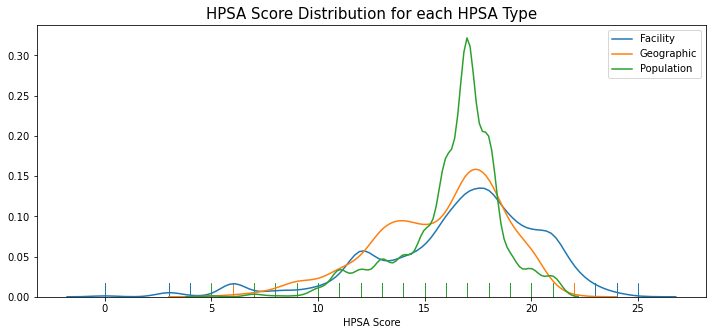

In [8]:
plt.figure(figsize=(12,5))
target_0 = hpsa[(hpsa['Designation'] == 'Facility')&(hpsa['HPSA Status'] == 'Designated')]
target_1 = hpsa[(hpsa['Designation'] == 'Geographic')&(hpsa['HPSA Status'] == 'Designated')]
target_2 = hpsa[(hpsa['Designation'] == 'Population')&(hpsa['HPSA Status'] == 'Designated')]

sns.distplot(target_0[['HPSA Score']], hist=False, rug=True, label = 'Facility')
sns.distplot(target_1[['HPSA Score']], hist=False, rug=True, label = 'Geographic')
sns.distplot(target_2[['HPSA Score']], hist=False, rug=True, label = 'Population')

plt.legend()
plt.title('HPSA Score Distribution for each HPSA Type', fontsize=15)
plt.xlabel('HPSA Score');

### Comparison of HPSA Score for different types of facilities

The Health Professional Shortage Area (HPSA) Score is assigned to determine priorities for assignment of clinicians. The scores range from 0 to 26 where the higher the score, the greater the priority.

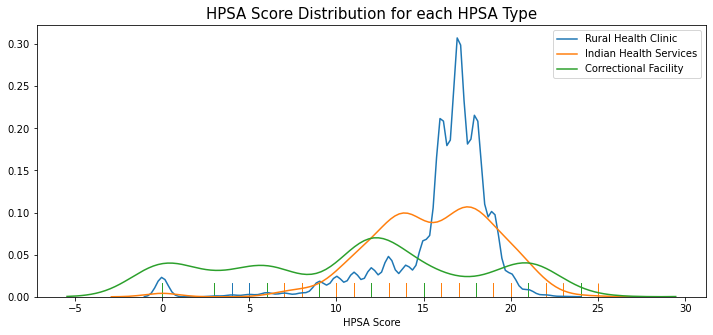

In [10]:
plt.figure(figsize=(12,5))
target_0=hpsa[hpsa['Designation Type']=='Rural Health Clinic']
target_1=hpsa[hpsa['Designation Type']=='Indian Health Service, Tribal Health, and Urban Indian Health Organizations']
target_2=hpsa[hpsa['Designation Type']=='Correctional Facility']

sns.distplot(target_0[['HPSA Score']], hist=False, rug=True, label = 'Rural Health Clinic')
sns.distplot(target_1[['HPSA Score']], hist=False, rug=True, label = 'Indian Health Services')
sns.distplot(target_2[['HPSA Score']], hist=False, rug=True, label = 'Correctional Facility')

plt.legend()
plt.title('HPSA Score Distribution for each HPSA Type', fontsize=15)
plt.xlabel('HPSA Score');

### Which facility is the most common designated as "HPSA"

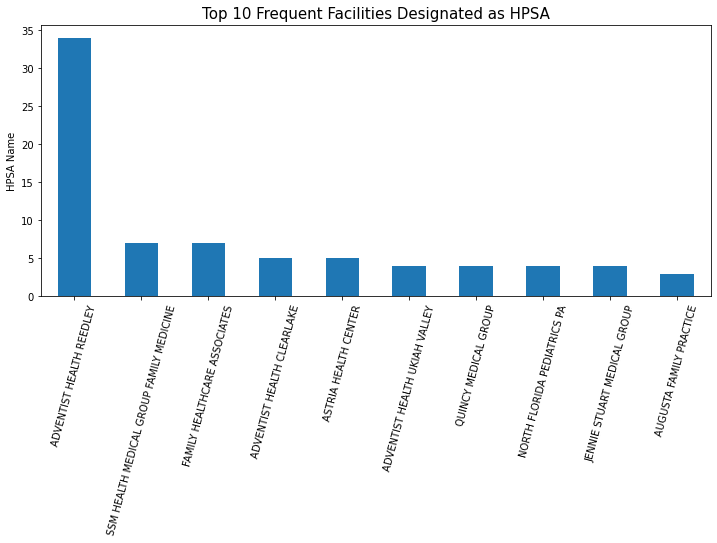

In [9]:
plt.figure(figsize=(12,5))
hpsa_facilities['HPSA Name'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar');
plt.title('Top 10 Frequent Facilities Designated as HPSA', fontsize=15)
plt.xticks(rotation=75)
plt.ylabel('HPSA Name');

### Number of Facility HPSAs designated over the years

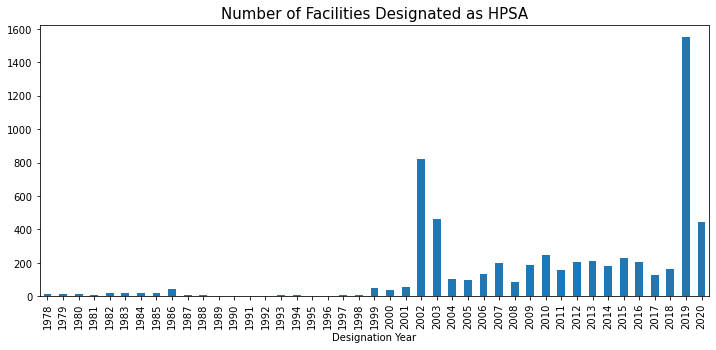

In [10]:
hpsa_facilities['HPSA Designation Date'] = pd.to_datetime(hpsa_facilities['HPSA Designation Date'])
hpsa_facilities_date = hpsa_facilities.set_index('HPSA Designation Date').sort_index()

plt.figure(figsize=(12,5))
x_labels = hpsa_facilities_date.resample('Y')['HPSA Name'].count().index.strftime('%Y')
figure_1 = hpsa_facilities_date.resample('Y')['HPSA Name'].count().plot.bar()
figure_1.set_xticklabels(x_labels);
plt.xlabel('Designation Year');
plt.title('Number of Facilities Designated as HPSA', fontsize=15);

### Comparing the total population of the US and the number of Facility HPSAs over the years

In [26]:
# This is the population of the U.S. taken from this website 
# https://www.multpl.com/united-states-population/table/by-year
population = [222.58, 225.06, 227.22, 229.47, 231.66, 233.79, 235.82, 237.92, 240.13, 242.29, 244.50, 246.82, 249.62,
              252.98, 256.51, 259.92, 263.13, 266.28, 269.39, 272.65, 275.85, 279.04, 282.16, 284.97, 287.63, 290.11,
              292.81,295.52, 298.38, 301.23, 304.09, 306.77, 309.32, 311.56, 313.83, 315.99, 318.30, 320.64, 322.94,
              324.99, 326.69, 328.24, 329.88]

years = list(np.arange(1978, 2021,1))

# Create a dataframe with the population information
d = {'population': population, 'years': years}
df = pd.DataFrame(data=d)

df['years'] = pd.to_datetime(df['years'])
df['years_'] = x_labels
df = df.set_index('years_').sort_index()

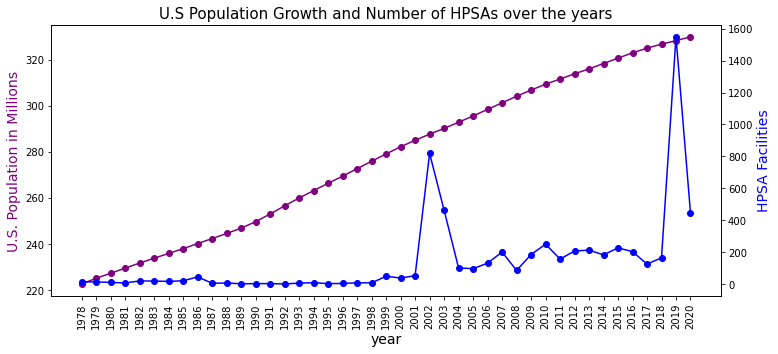

In [27]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(x_labels, df['population'], color='purple', marker='o')
ax.set_xlabel('year',fontsize=14)
plt.xticks(rotation=90)
ax.set_ylabel('U.S. Population in Millions',color='purple',fontsize=14)


ax2=ax.twinx()
ax2.plot(x_labels, hpsa_facilities_date.resample('Y')['HPSA Name'].count(),color='blue',marker='o')
ax2.set_ylabel('HPSA Facilities',color='blue',fontsize=14)
plt.title('U.S Population Growth and Number of HPSAs over the years', fontsize=15)
plt.show()

### States with the most HPSA Facilities

In [28]:
hpsa_facilities['State Name'].value_counts()[:10]

California    571
Texas         347
Michigan      313
Alaska        299
Missouri      295
Florida       220
Illinois      200
New York      191
Washington    179
Arizona       167
Name: State Name, dtype: int64

### States with the most HPSA Facilities in 2020

In [29]:
hpsa_facilities_date['2020']['State Name'].value_counts()[:10]

Alaska        40
California    32
Arizona       23
Kansas        23
Washington    21
Louisiana     20
Minnesota     18
Texas         16
Nebraska      16
Missouri      15
Name: State Name, dtype: int64

### Hows does the increase of HPSA facilities looks over the years?

In [30]:
# This function will create the features for the interactive map on TimestampedGeoJson
def create_geojson_features(df):
    features = []
    
    for _, row in df.iterrows():
        feature = {
            'type': 'Feature',
            'geometry': {
                'type':'Point', 
                'coordinates':[row['Longitude'],row['Latitude']]
            },
            'properties': {
                'time': pd.to_datetime(row['HPSA Designation Date'], unit='Y').__str__(),
                'style': {'color' : ''},
                'icon': 'circle',
                'iconstyle':{
                    'fillColor': 'blue',
                    'fillOpacity': 0.4,
                    'stroke': 'true',
                    'radius': 2
                }
            }
        }
        features.append(feature)
    
    return features

In [31]:
hpsa_facilities_date.dropna(subset = ['Latitude', 'Longitude'], inplace = True)

In [32]:
temp = hpsa_facilities_date['2010':]
temp.reset_index(inplace=True)

In [33]:
features = create_geojson_features(temp)

In [34]:
facility_years = folium.Map(location = [37.6, -95.665], zoom_start = 3)

plugins.TimestampedGeoJson(features,
                  period = 'P1Y',
                  transition_time = 1000,
                  loop = False,
                  date_options = 'YYYY',
                  auto_play = True).add_to(facility_years)
facility_years

In [264]:
out_path = '../interactive_maps/'
outfp = 'facilities_over_years_map.html'

In [265]:
facility_years.save(out_path + outfp)